In [1]:
# Import Standard Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib 
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns


<h3>Load Data</h3>

In [2]:
# load and prep data

df = pd.read_csv(r"C:\Users\Raja Alamsyah\OneDrive\Dokumen\Data Analyst\movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<h3>Missing Data</h3>

In [4]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Data type for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Replace missing values with mode

df['budget'] = df['budget'].fillna(df['budget'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['gross'] = df['gross'].fillna(df['gross'].mode()[0])

In [9]:
# Check to know still had missing data or not

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


<h3>Data Cleanup / Prep</h3>

In [12]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [27]:
# Create correctly Year in column

df['yearcorrect'] = df['released'].str.extract(pat='([0-9]{4})').astype('float64').astype('Int64')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,14000000,NaN,90.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20000000,14000000,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,14000000,Embi Productions,NaN,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,14000000,NaN,120.0,2020


<AxesSubplot:xlabel='gross'>

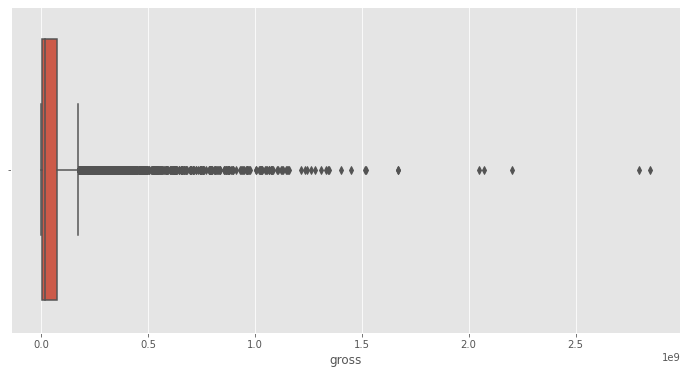

In [29]:
# Check if are there any Outliers or not ?

plt.figure(figsize=(12,6))
sns.boxplot(x='gross', data=df)

In [30]:
df.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20000000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20000000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20000000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


<h3>Data Correlation</h3>

<AxesSubplot:xlabel='gross', ylabel='budget'>

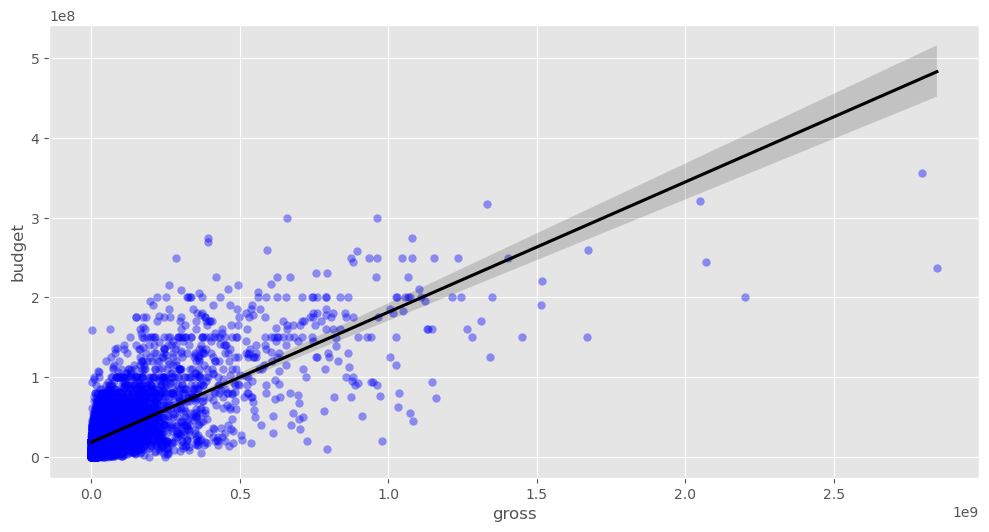

In [36]:
plt.figure(figsize=(12,6), dpi=100)
sns.regplot(x='gross', y='budget', data=df, scatter_kws={"color":"blue","linewidth":0,"alpha":0.4}, line_kws={"color":"black"})

<AxesSubplot:xlabel='score', ylabel='gross'>

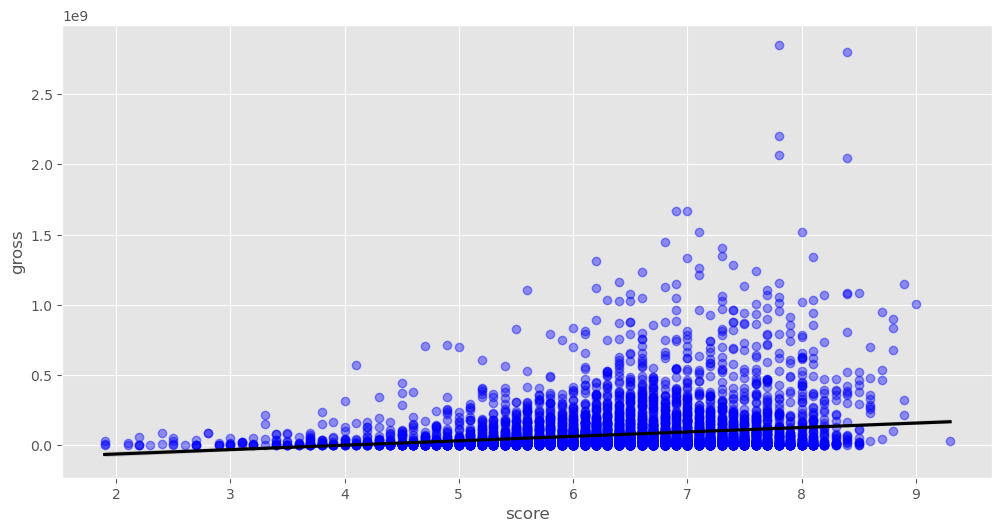

In [40]:
plt.figure(figsize=(12,6), dpi=100)
sns.regplot(x='score', y='gross', data=df, scatter_kws={"color":"blue","alpha":0.4}, line_kws={"color":"black"})

In [41]:
# Correlation Matrix between all numeric columns
# Compared using different methods

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.292360,0.260251,0.120811
score,0.097995,1.000000,0.409182,0.061857,0.185839,0.399451
votes,0.222945,0.409182,1.000000,0.461944,0.632352,0.309212
budget,0.292360,0.061857,0.461944,1.000000,0.746670,0.273457
gross,0.260251,0.185839,0.632352,0.746670,1.000000,0.244638
runtime,0.120811,0.399451,0.309212,0.273457,0.244638,1.000000


In [42]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.192458,0.199261,0.097184
score,0.067652,1.000000,0.300115,-0.003833,0.085158,0.283611
votes,0.331465,0.300115,1.000000,0.282780,0.535799,0.198240
budget,0.192458,-0.003833,0.282780,1.000000,0.392712,0.196640
gross,0.199261,0.085158,0.535799,0.392712,1.000000,0.167212
runtime,0.097184,0.283611,0.198240,0.196640,0.167212,1.000000


In [43]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.266817,0.291816,0.142977
score,0.099045,1.000000,0.428138,-0.005838,0.124731,0.399857
votes,0.469829,0.428138,1.000000,0.397787,0.729246,0.290159
budget,0.266817,-0.005838,0.397787,1.000000,0.538178,0.275144
gross,0.291816,0.124731,0.729246,0.538178,1.000000,0.244133
runtime,0.142977,0.399857,0.290159,0.275144,0.244133,1.000000


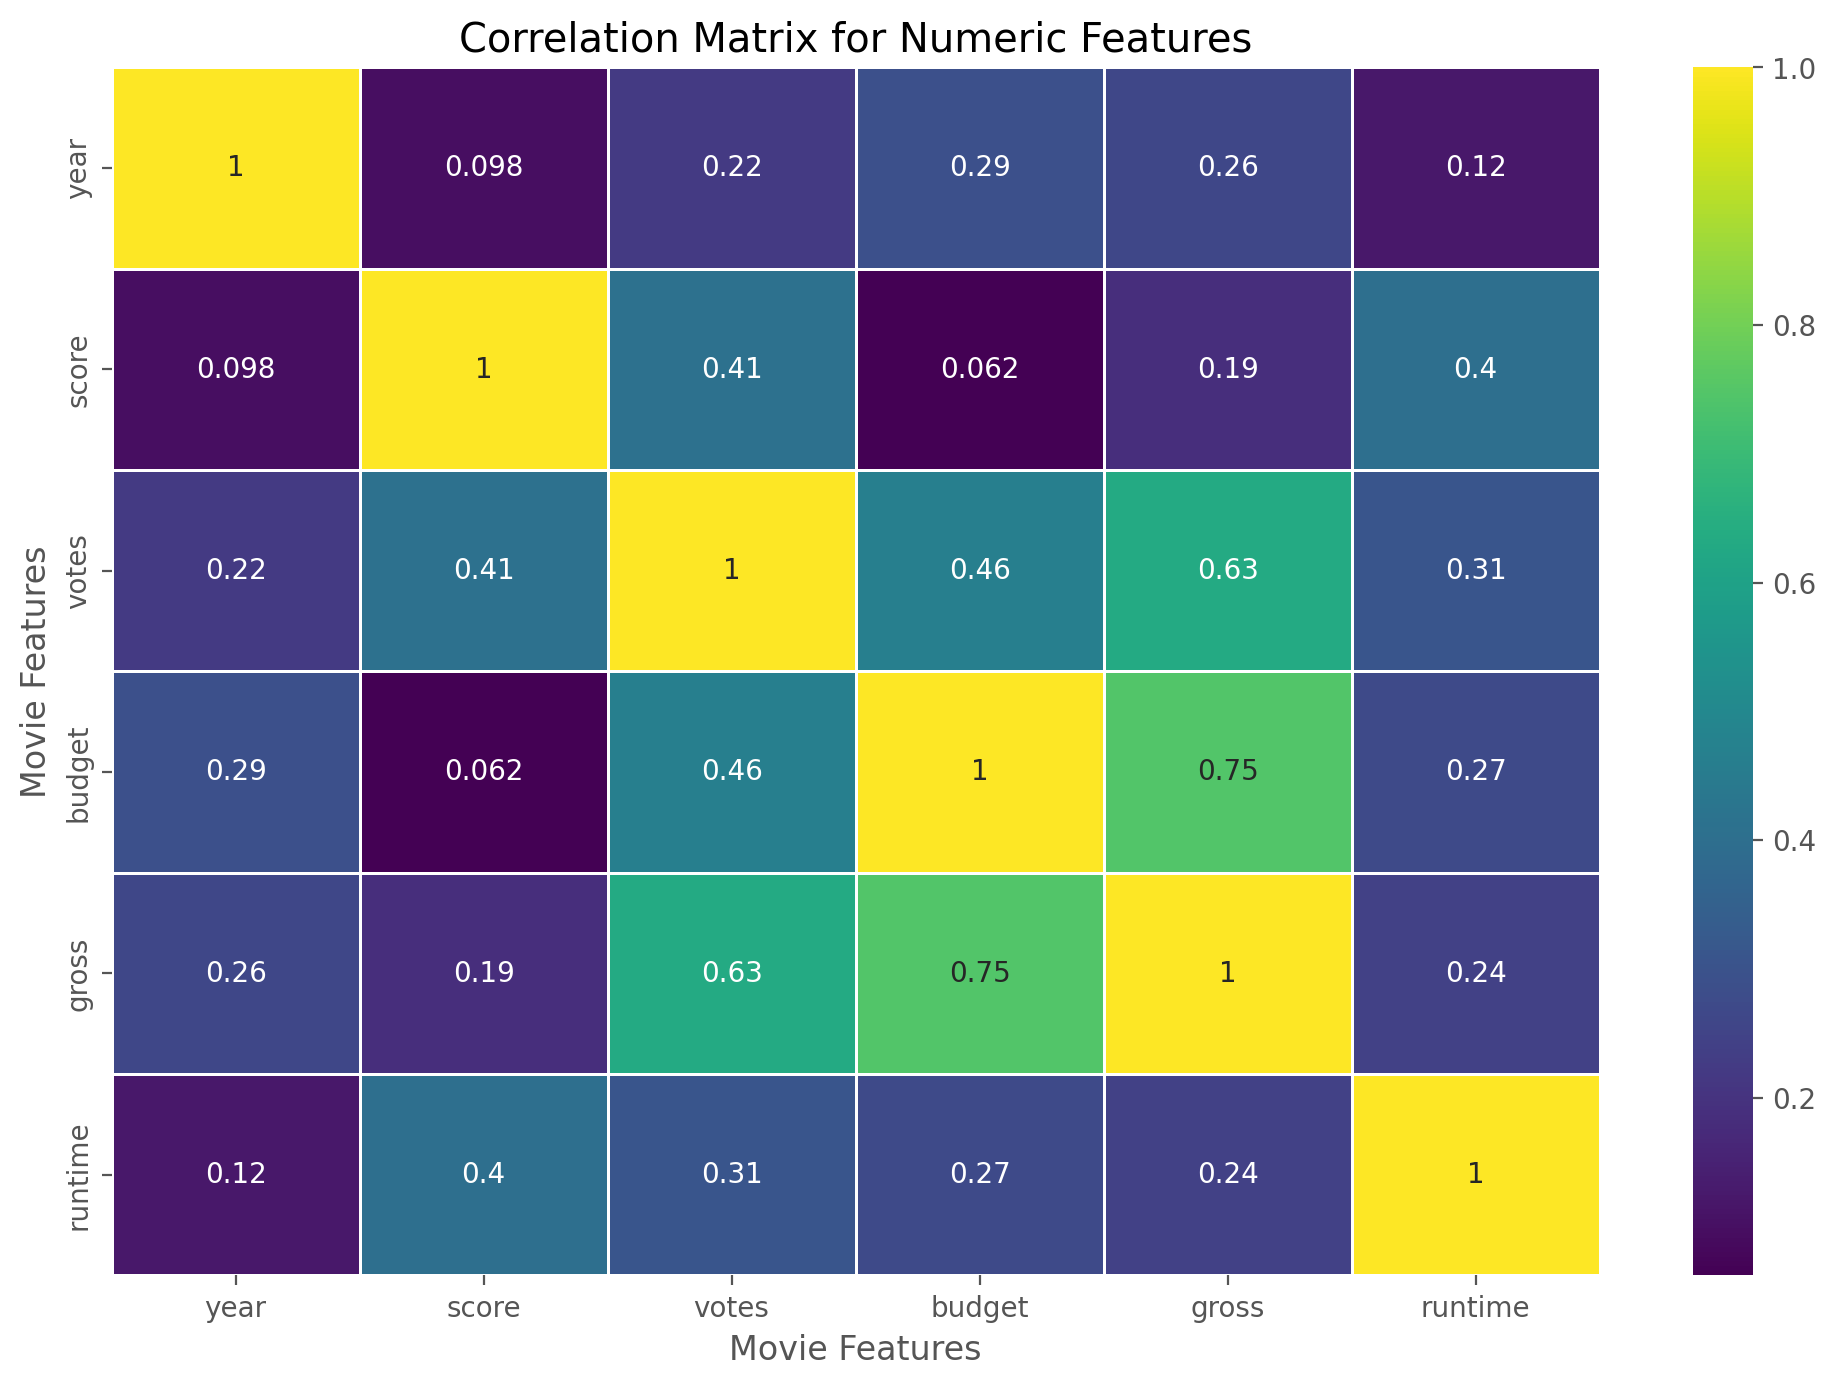

In [45]:
corr_matrix = df.corr() #deufalt df.corr() is 'pearson'

plt.figure(figsize=(12,8), dpi=200)

sns.heatmap(corr_matrix, linewidth=0.5, annot=True, cmap='viridis')

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [50]:
# Using factorize with a random numeric values for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.145480,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.276159,0.947544,0.591667,0.048955,0.819948
rating,0.145480,1.000000,-0.086921,0.158154,0.148151,0.012705,0.101796,0.087517,0.105405,0.095374,0.003090,0.192979,0.158317,-0.025795,0.033327,0.138045
genre,0.036367,-0.086921,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.070098,0.038602,0.009566,0.001462,0.028570
year,0.965761,0.158154,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.298655,0.981092,0.601571,0.050647,0.848638
released,0.959015,0.148151,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.284490,0.976650,0.607954,0.048235,0.840589
score,-0.046733,0.012705,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.011867,-0.046958,-0.028432,0.026436,-0.038776
votes,0.287776,0.101796,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.396135,0.286296,0.008900,0.106024,0.276969
director,0.745905,0.087517,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.107926,0.751151,0.552258,-0.011070,0.641912
writer,0.805211,0.105405,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.186883,0.805794,0.546151,0.032264,0.706832
star,0.731565,0.095374,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.110492,0.735914,0.527116,0.035392,0.638927


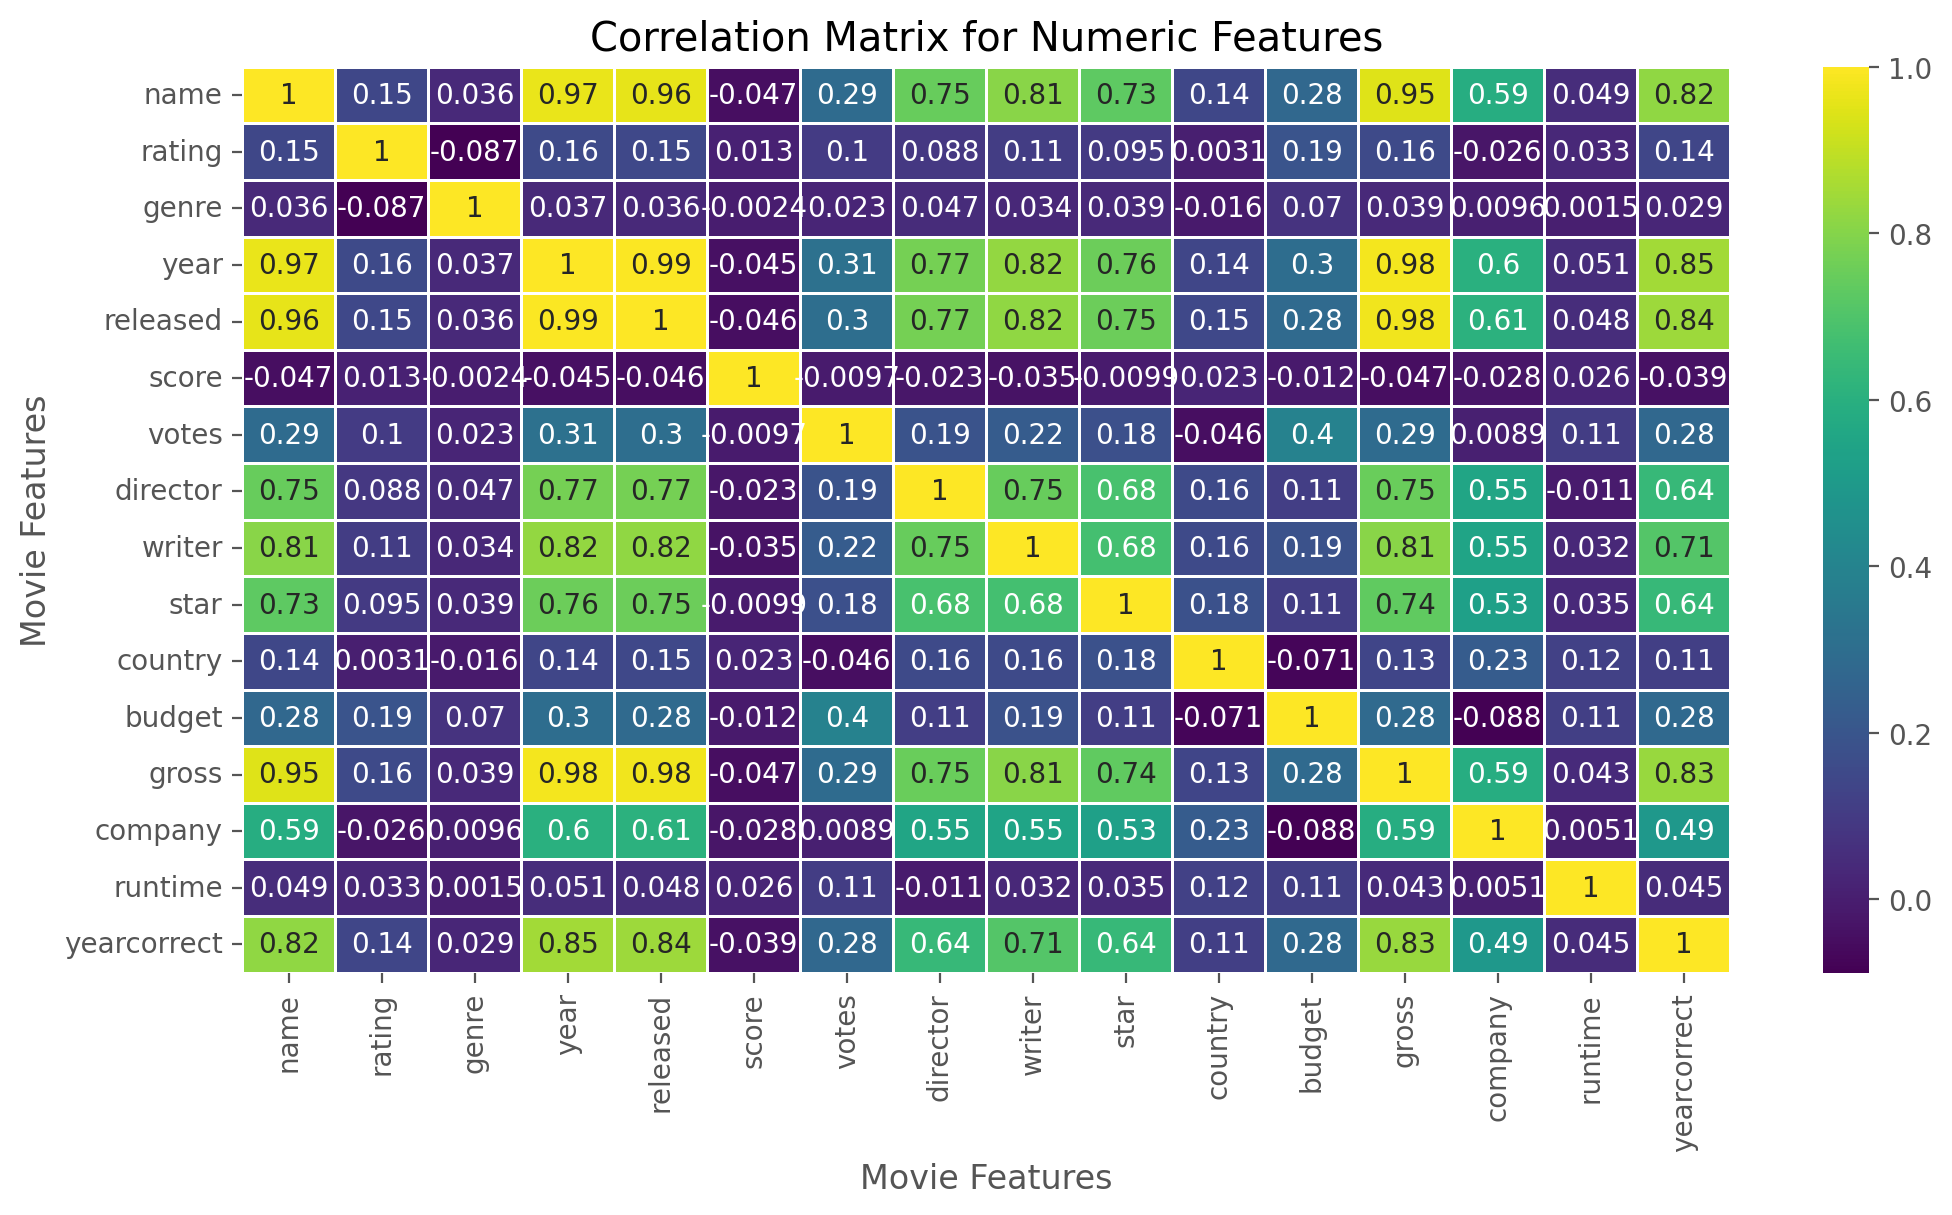

In [52]:
corr_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

plt.figure(figsize=(12,6), dpi=200)

sns.heatmap(corr_matrix, linewidth=0.5, annot=True, cmap='viridis')

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [57]:
corr_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = corr_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.145480
             genre          0.036367
             year           0.965761
             released       0.959015
                              ...   
yearcorrect  budget         0.281645
             gross          0.831772
             company        0.494159
             runtime        0.045062
             yearcorrect    1.000000
Length: 256, dtype: float64


In [58]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

company      budget        -0.088092
budget       company       -0.088092
genre        rating        -0.086921
rating       genre         -0.086921
country      budget        -0.071174
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [59]:
# Now can take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company      star           0.527116
star         company        0.527116
company      writer         0.546151
writer       company        0.546151
director     company        0.552258
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 86, dtype: float64


In [61]:
# Looking at the top 15 Companies by Gross Revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending=False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted

company
Warner Bros.                 56505421806
Universal Pictures           52528188890
Columbia Pictures            43008941346
Paramount Pictures           40507607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9258230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [62]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [73]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross', 'company', 'year'], ascending=False)[:15]

CompanyGrossSumSorted = CompanyGrossSum['gross'].astype('int64')

CompanyGrossSumSorted

company                              year
"DIA" Productions GmbH & Co. KG      2003     44350926
"Weathering With You" Film Partners  2019    193457467
.406 Production                      1996        10580
1+2 Seisaku Iinkai                   2000      1196218
10 West Studios                      2010       814906
                                               ...    
i am OTHER                           2015     17986781
i5 Films                             2001     10031529
iDeal Partners Film Fund             2013       506303
micro_scope                          2010      7099598
thefyzz                              2017     62198461
Name: gross, Length: 4536, dtype: int64

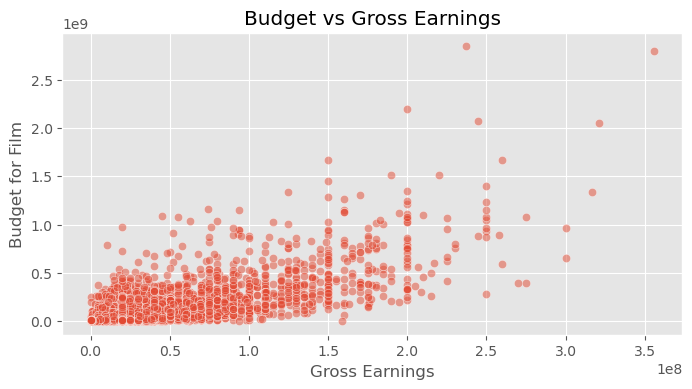

In [78]:
plt.figure(figsize=(8,4), dpi=100)

sns.scatterplot(x='budget', y='gross', data=df, alpha=0.5)

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [84]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,14000000,-1,90.0,40
7664,1678,6,4,2020,1107,4.7,36.0,774,2614,1886,55,20000000,14000000,539,90.0,40
7665,4717,6,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,14000000,941,NaN,40
7666,2843,6,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,14000000,-1,120.0,40


In [85]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012441,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020926,0.006721,0.009211,0.010392,0.010225
rating,-0.012441,1.000000,0.123465,0.027931,0.023466,0.013247,0.012379,0.016255,-0.005289,0.005092,0.025857,-0.148192,-0.130496,-0.083227,0.066647,0.027897
genre,0.016355,0.123465,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.328865,-0.233674,-0.071067,-0.052711,-0.078210
year,0.011453,0.027931,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.292360,0.260251,-0.010431,0.120811,0.996397
released,-0.011311,0.023466,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.011076,0.000718,-0.010474,0.000868,-0.003775
score,0.017097,0.013247,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.061857,0.185839,0.001030,0.399451,0.106295
votes,0.013088,0.012379,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.461944,0.632352,0.133204,0.309212,0.218289
director,0.009079,0.016255,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.003361,-0.014808,0.004404,0.017624,-0.020385
writer,0.009081,-0.005289,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.030539,-0.023044,0.005646,-0.003511,-0.008391
star,0.006472,0.005092,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.018585,-0.001406,0.012442,0.010174,-0.027606


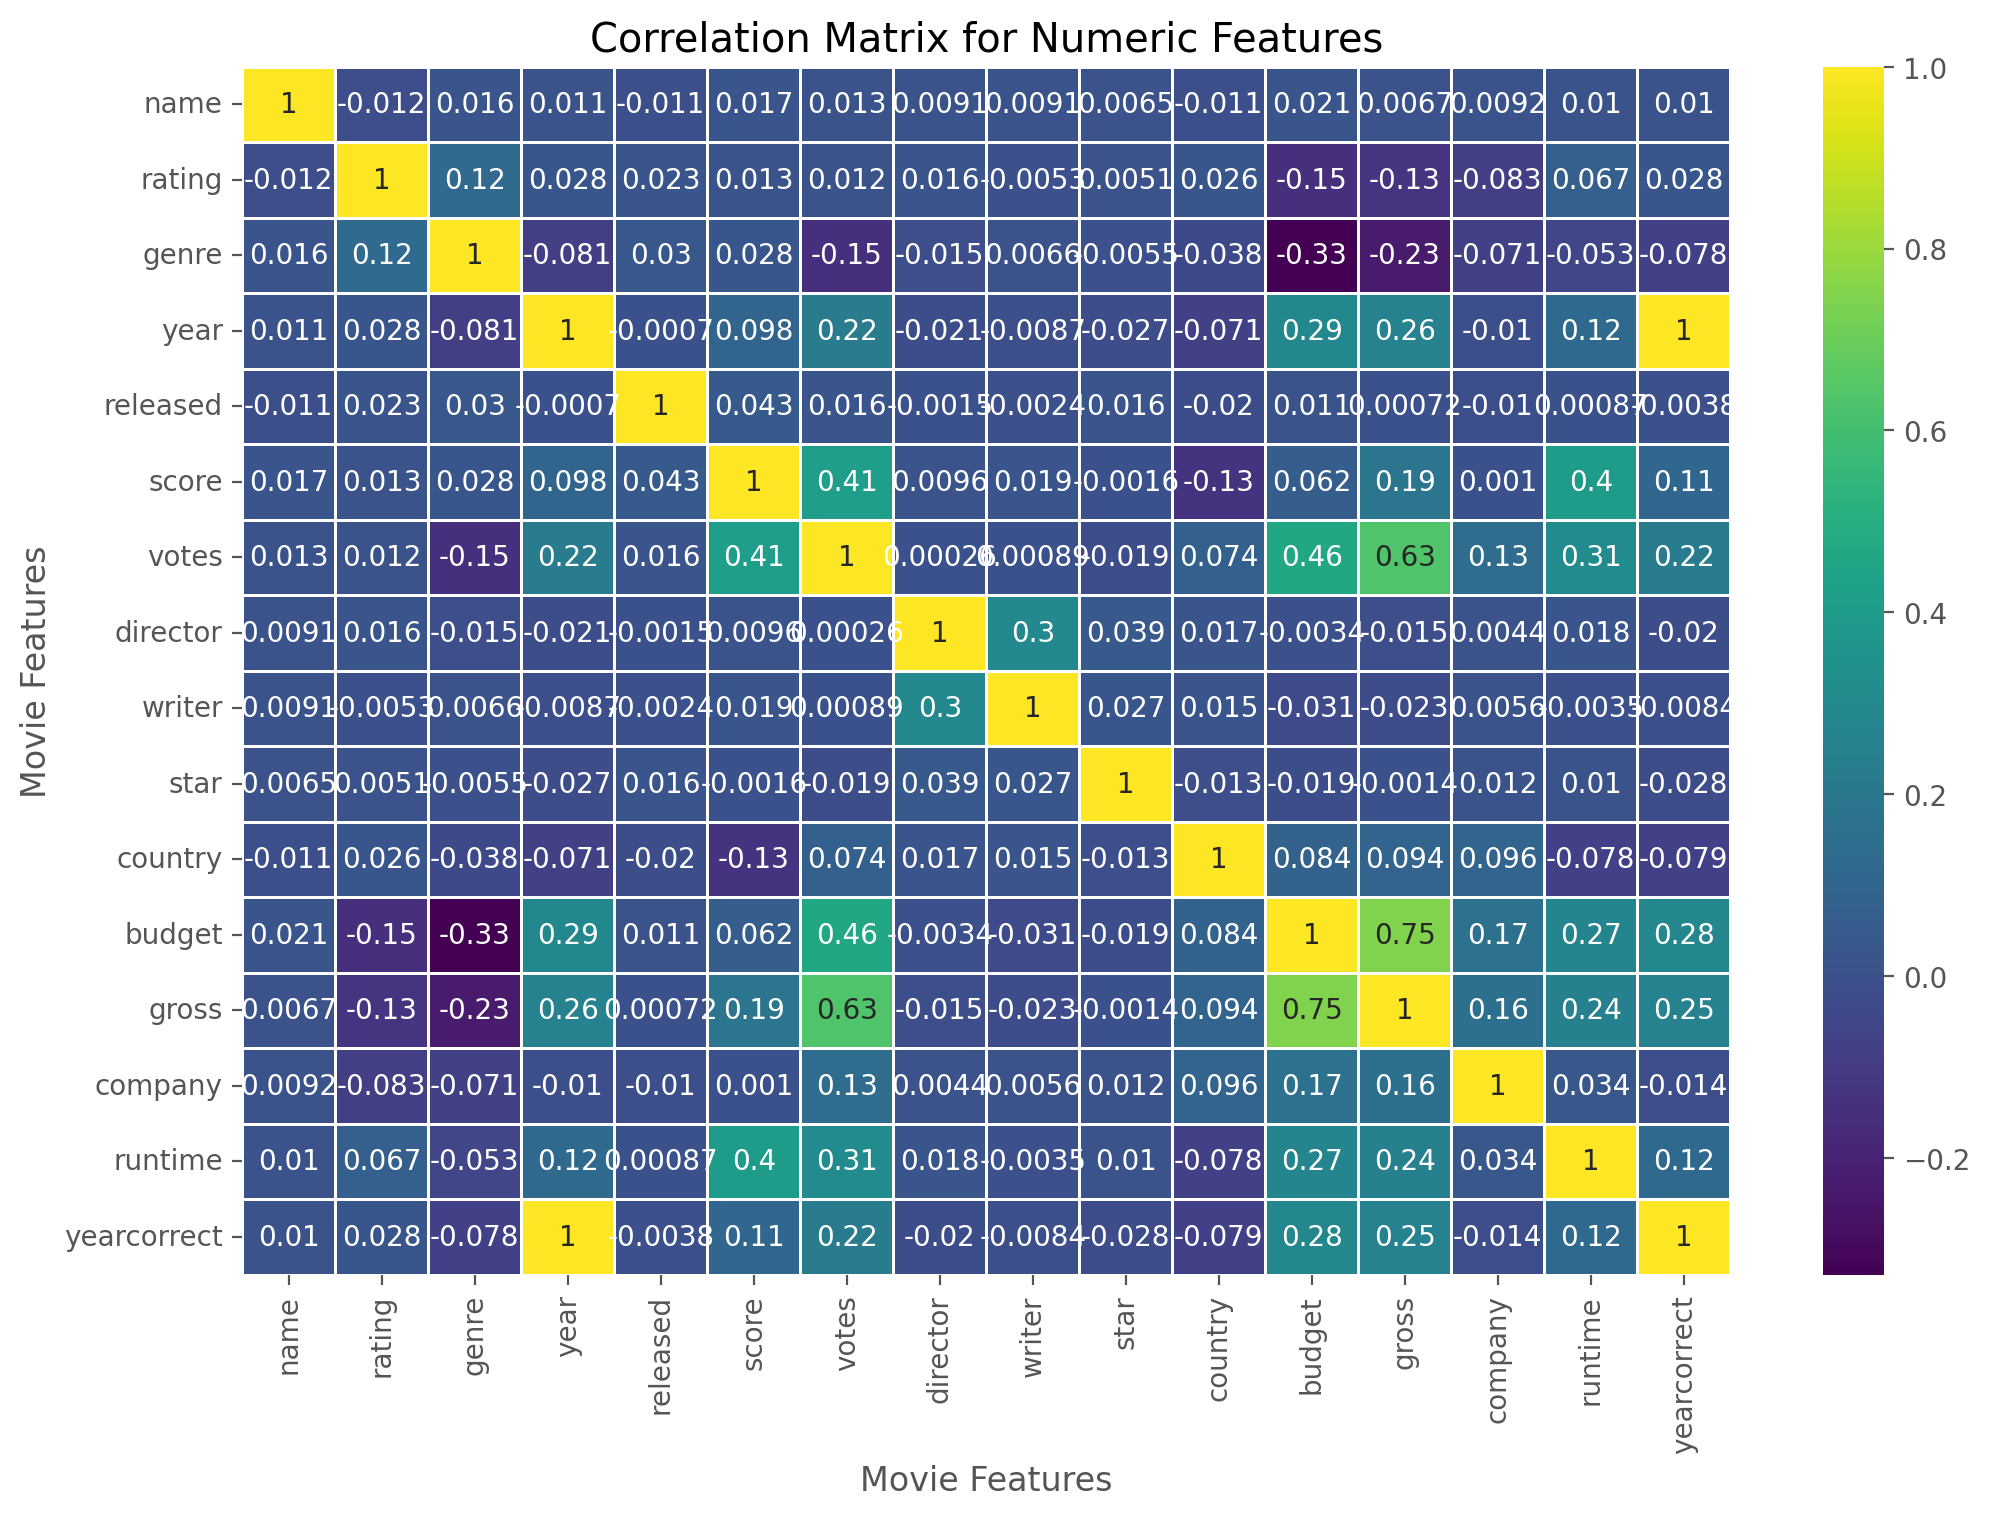

In [91]:
corr_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(12,8), dpi=200)

sns.heatmap(corr_matrix, linewidth=0.5, annot=True, cmap='viridis')

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()